# 1. Importing Libraries and Dataset

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

In [2]:
df = pd.read_csv('HEXACO and PA - figshare.csv')

# 2. EDA

## 2.1 Dataset Overview

In [3]:
# 1. General information about the dataset
print("----- Dataset Info -----")
df.info()

----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   stu                        2580 non-null   object 
 1   sex                        2580 non-null   int64  
 2   fitbit_steps               2417 non-null   float64
 3   fitbit_resting_heart_rate  399 non-null    float64
 4   bmi                        1431 non-null   float64
 5   lifestyle_score            2346 non-null   float64
 6   Honesty/Humility           1873 non-null   float64
 7   Negative Emotionality      2580 non-null   float64
 8   Extraversion               2580 non-null   float64
 9   Agreeableness              2580 non-null   float64
 10  Conscientiousness          2580 non-null   float64
 11  Openness to Experiences    2580 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 242.0+ KB


**Dataset Overview:**
- The dataset consists of 2580 rows and 12 columns.

- The columns represent both categorical and numeric data types, where 10 columns are numeric (float64), 1 is an integer (int64), and 1 is categorical (object).
- The dataset contains several missing values in key columns such as fitbit_steps, fitbit_resting_heart_rate, bmi, lifestyle_score, and Honesty/Humility.

## 2.2 Missing Values

In [4]:
# 2. Checking for missing values
print("\n----- Missing Values -----")
missing_values = df.isnull().sum()
print(missing_values)


----- Missing Values -----
stu                             0
sex                             0
fitbit_steps                  163
fitbit_resting_heart_rate    2181
bmi                          1149
lifestyle_score               234
Honesty/Humility              707
Negative Emotionality           0
Extraversion                    0
Agreeableness                   0
Conscientiousness               0
Openness to Experiences         0
dtype: int64


- fitbit_resting_heart_rate has the most missing data, with 2181 missing entries (84% of the data).
- BMI is also missing a significant portion, with 1149 missing entries (45% of the data).
- Other columns with missing values include:
    - fitbit_steps: 163 missing entries.
    - lifestyle_score: 234 missing entries.
    - Honesty/Humility: 707 missing entries.

## 2.3 Data Types

In [5]:
# 3. Data types of each column
print("\n----- Data Types -----")
data_types = df.dtypes
print(data_types)


----- Data Types -----
stu                           object
sex                            int64
fitbit_steps                 float64
fitbit_resting_heart_rate    float64
bmi                          float64
lifestyle_score              float64
Honesty/Humility             float64
Negative Emotionality        float64
Extraversion                 float64
Agreeableness                float64
Conscientiousness            float64
Openness to Experiences      float64
dtype: object


## 2.4 Descriptive Statistics

In [6]:
# 4. Descriptive statistics (summary statistics)
print("\n----- Descriptive Statistics -----")
descriptive_stats = df.describe()
print(descriptive_stats)


----- Descriptive Statistics -----
               sex  fitbit_steps  fitbit_resting_heart_rate          bmi  \
count  2580.000000   2417.000000                 399.000000  1431.000000   
mean      0.395349  10291.757551                  67.027569    24.706639   
std       0.489020   2989.821832                   7.773602     5.344148   
min       0.000000    461.000000                  45.000000    15.700000   
25%       0.000000   8611.000000                  62.000000    21.100000   
50%       0.000000  10301.000000                  67.000000    23.400000   
75%       1.000000  12176.000000                  72.000000    26.600000   
max       1.000000  19892.000000                  88.000000    49.400000   

       lifestyle_score  Honesty/Humility  Negative Emotionality  Extraversion  \
count      2346.000000       1873.000000            2580.000000   2580.000000   
mean         71.836317          3.954474               3.135163      3.530589   
std          18.659594          0.65

- Sex: This column is binary with values 0 and 1 (likely representing female and male).
- Fitbit Steps: Participants have an average of 10,291 steps, with a standard deviation of 2,989 steps. The minimum is 461 steps, and the maximum is 19,892 steps.
- BMI: The average BMI is 24.71, which falls into the "Normal" weight category. BMI values range from 15.7 (underweight) to 49.4 (obese).
- Resting Heart Rate: The average resting heart rate is 67 BPM, with a range from 45 BPM to 88 BPM.
- Personality Traits:
    - Honesty/Humility: Mean score is 3.95, with scores ranging from 1.17 to 5.00.
    - Negative Emotionality: The mean score is 3.14, with some participants having very low scores (1) and others at the maximum (5).
    - Extraversion: The mean score is 3.53, indicating moderate levels of extroversion.
    - Agreeableness, Conscientiousness, and Openness: All traits show moderate averages, with values close to 3.6 to 3.8.

## 2.5 Distribution of Fitbit Steps

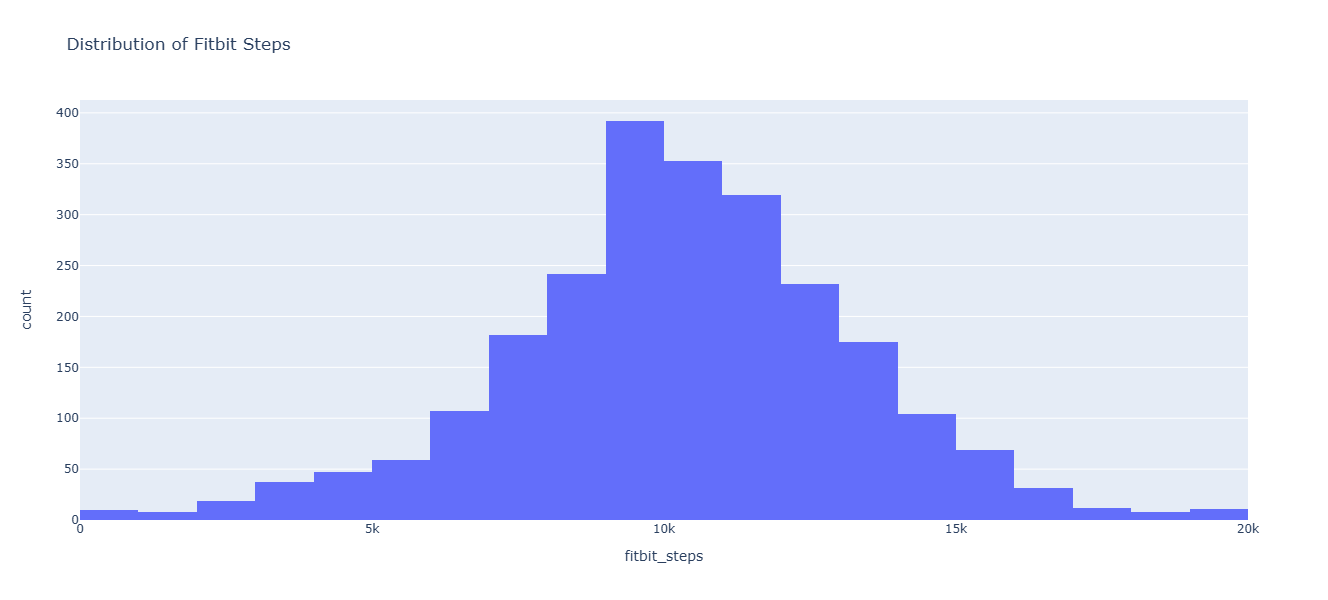

In [111]:
# 1. Distribution of Fitbit Steps
fig_steps = px.histogram(df, x='fitbit_steps', nbins=20, title='Distribution of Fitbit Steps', labels={'x':'Steps'})
fig_steps.update_layout(width=600, height=600)
fig_steps.show()

- The distribution is approximately bell-shaped, indicating a normal distribution around the mean.
- The peak of the distribution occurs around 10,000 steps, meaning a significant number of participants log around this number of steps daily.
- The distribution tails off toward both the lower end (fewer than 5,000 steps) and the higher end (more than 15,000 steps), suggesting fewer participants record extremely low or high step counts.

This distribution shows that most participants achieve a step count close to the commonly recommended 10,000 steps per day for maintaining good health.

## 2.6 Distribution of BMI

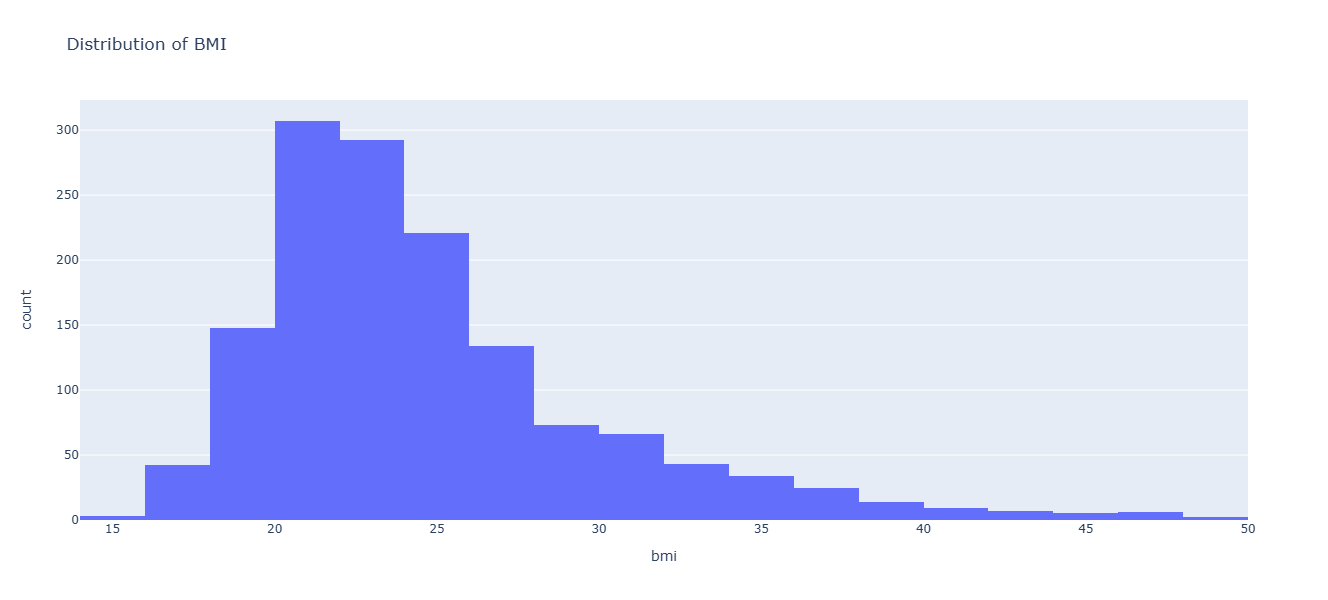

In [109]:
# 2. Distribution of BMI
fig_bmi = px.histogram(df, x='bmi', nbins=20, title='Distribution of BMI', labels={'x':'BMI'})
fig_bmi.update_layout(width=600, height=600)
fig_bmi.show()

- The peak of the distribution is around 20-25 BMI, indicating that most participants have BMI values that fall into the normal weight category (18.5–24.9).
- As BMI values increase, the number of participants gradually decreases.
- There are fewer participants with BMI values above 30, which falls into the overweight and obese categories.
Very few participants have BMI values above 35, which is classified as severely obese.

Overall Observations:
- Most of the dataset consists of participants with a BMI in the normal range (around 20-25).
- A smaller proportion of participants are classified as overweight (BMI 25-29.9) or obese (BMI above 30).

## 2.7 Distribution of Resting Heart Rate

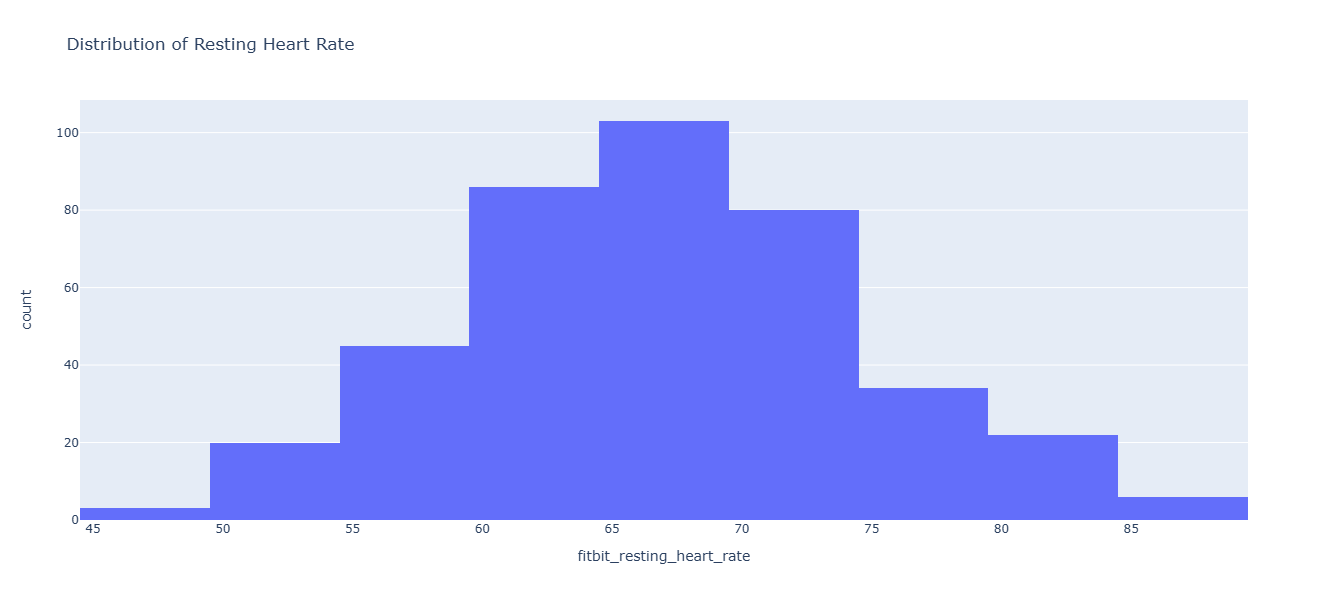

In [110]:
# 3. Distribution of Resting Heart Rate
fig_heart_rate = px.histogram(df, x='fitbit_resting_heart_rate', nbins=20, title='Distribution of Resting Heart Rate', labels={'x':'Resting Heart Rate (BPM)'})
fig_heart_rate.update_layout(width=600, height=600)
fig_heart_rate.show()

Insights:
- The distribution follows a bell-shaped or normal distribution pattern, centered around 65 BPM.
- The majority of participants have resting heart rates between 60 BPM and 70 BPM, which falls within the typical resting heart rate range for adults.
- There are fewer participants with resting heart rates below 55 BPM or above 75 BPM.

Observations:
- Resting heart rates around 65 BPM are considered within the normal range for most adults.
- Low heart rates (below 55 BPM) may indicate individuals who are either well-conditioned (e.g., athletes) or who may have certain medical conditions.
- Higher heart rates (above 75 BPM) could indicate stress or other health-related conditions in some participants.

The histogram provides a clear picture of the normal resting heart rate distribution, with most participants falling in the healthy range.

## 2.8 Box Plot for Physical Data

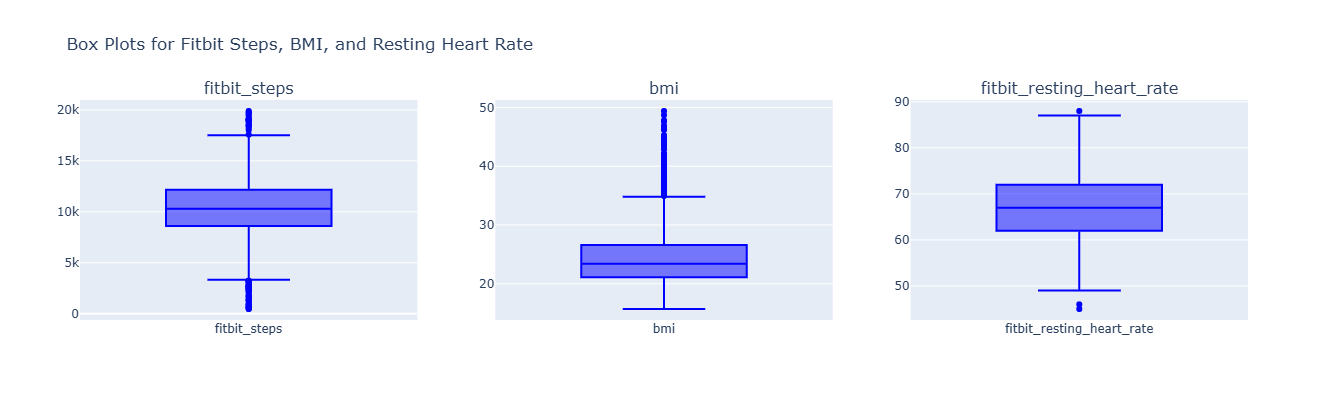

In [10]:
# List of health metrics to plot
traits_health = ['fitbit_steps', 'bmi', 'fitbit_resting_heart_rate']

# Create subplots: 1 row, 3 columns
fig_health = make_subplots(rows=1, cols=3, subplot_titles=traits_health)

# Add box plots for each metric (Fitbit steps, BMI, Resting Heart Rate)
for i, trait in enumerate(traits_health):
    col = i + 1   # Determine column index
    fig_health.add_trace(go.Box(y=df[trait], name=trait, boxpoints='outliers', marker_color='blue'), row=1, col=col)

# Update layout for the plot
fig_health.update_layout(height=400, width=900, title_text="Box Plots for Fitbit Steps, BMI, and Resting Heart Rate", showlegend=False)

# Show the plot
fig_health.show()

- Fitbit Steps and BMI show a significant number of outliers, indicating variability in physical activity and body composition across participants.
- Resting Heart Rate has fewer outliers, suggesting that most participants have a heart rate within a healthy range.

## 2.9 Distribution of Personality traits

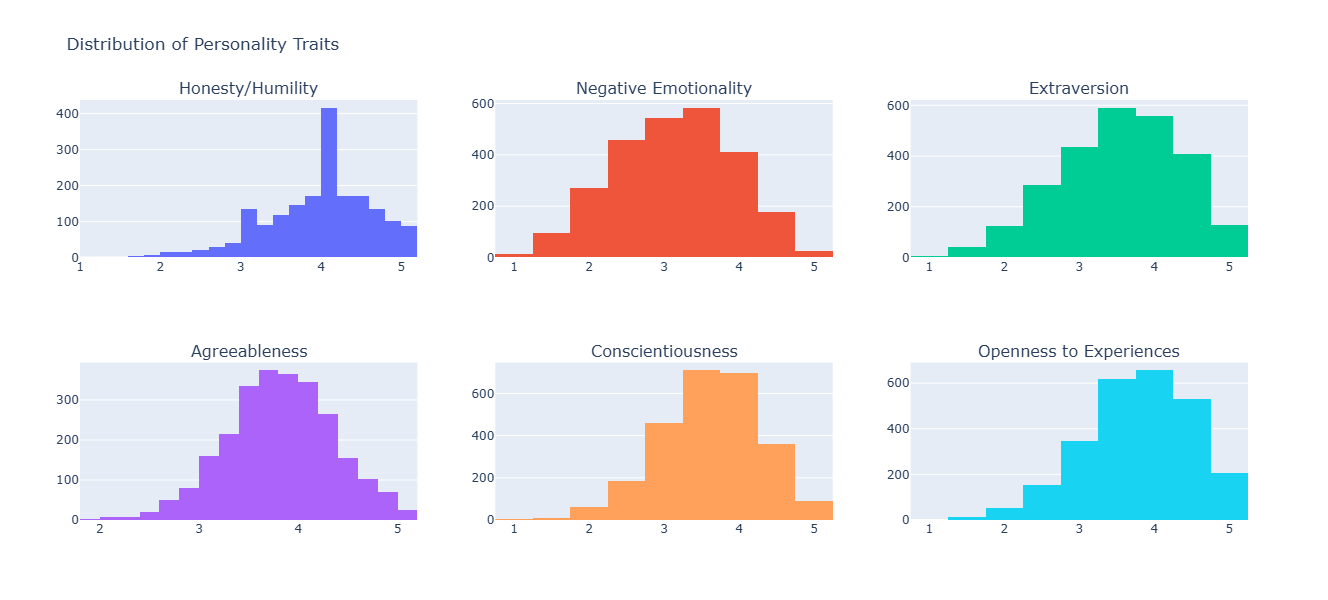

In [11]:
# Personality traits
traits = ['Honesty/Humility', 'Negative Emotionality', 'Extraversion', 'Agreeableness', 'Conscientiousness', 'Openness to Experiences']

# Create subplots: 2 rows, 3 columns
fig = sp.make_subplots(rows=2, cols=3, subplot_titles=traits)

# Adding each trait as a histogram in its respective subplot
for i, trait in enumerate(traits):
    row = i // 3 + 1  # Calculate row number
    col = i % 3 + 1   # Calculate column number
    fig.add_trace(go.Histogram(x=df[trait], nbinsx=20, name=trait), row=row, col=col)

# Update layout for the figure
fig.update_layout(height=600, width=900, title_text="Distribution of Personality Traits", showlegend=False)

# Show the figure
fig.show()


- The personality traits, for the most part, follow a normal distribution, with the exception of Honesty/Humility, which has a sharp peak at the higher end, indicating many participants rate themselves highly on this trait.
- Traits like Agreeableness, Conscientiousness, and Openness to Experiences show that the majority of participants consider themselves moderately or highly aligned with these traits.

## 2.10 Box Plots for Personality Traits

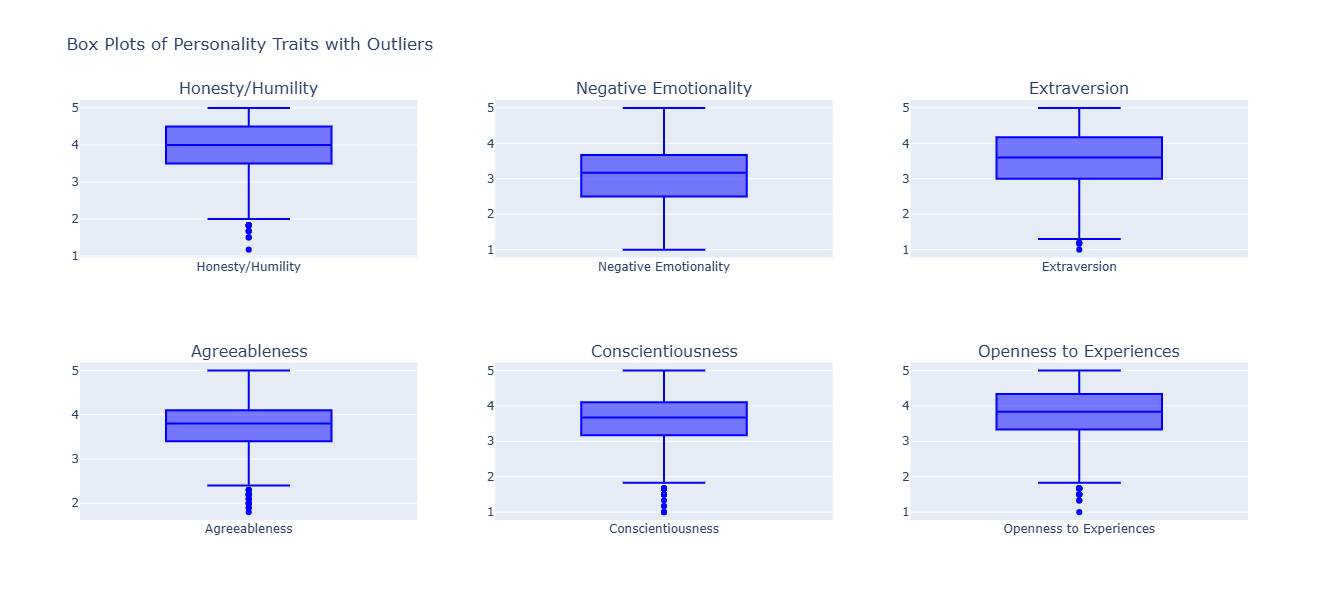

In [12]:
# List of personality traits to plot
traits = ['Honesty/Humility', 'Negative Emotionality', 'Extraversion', 
          'Agreeableness', 'Conscientiousness', 'Openness to Experiences']

# Create subplots: 2 rows, 3 columns
fig = make_subplots(rows=2, cols=3, subplot_titles=traits)

# Add box plots for each trait
for i, trait in enumerate(traits):
    row = i // 3 + 1  # Determine row index
    col = i % 3 + 1   # Determine column index
    fig.add_trace(go.Box(y=df[trait], name=trait, boxpoints='outliers', marker_color='blue'), row=row, col=col)

# Update layout for the plot
fig.update_layout(height=600, width=900, title_text="Box Plots of Personality Traits with Outliers", showlegend=False)

# Show the plot
fig.show()

- Traits like Honesty/Humility, Extraversion, and Openness to Experiences show a few participants with very low scores, indicating outliers.
- Negative Emotionality appears to have a more consistent distribution with no extreme outliers.

## 2.11 Correlation Matrix

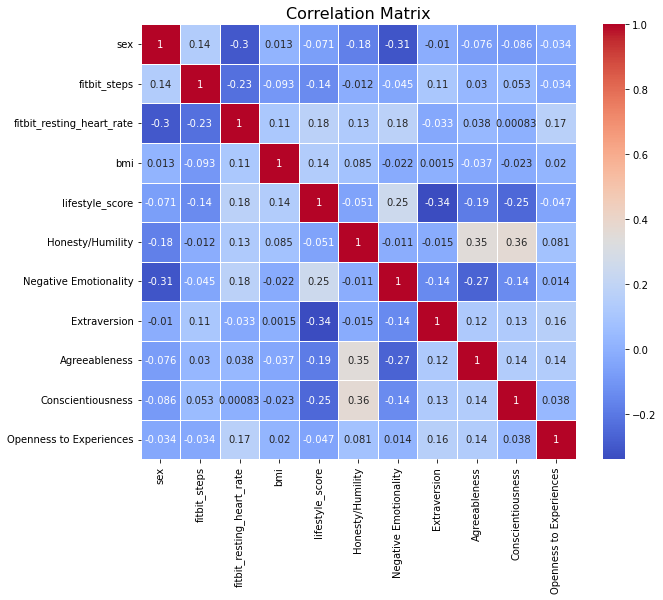

In [13]:
# Generate a correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=.5)

# Add title to the heatmap
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()


# 3. Data Pre-processing

## 3.1 Handling Missing Value's

In [14]:
columns_with_missing = ['fitbit_steps', 'fitbit_resting_heart_rate', 'bmi', 'lifestyle_score', 'Honesty/Humility']

### 3.1.1 Distribution before handling missing Values

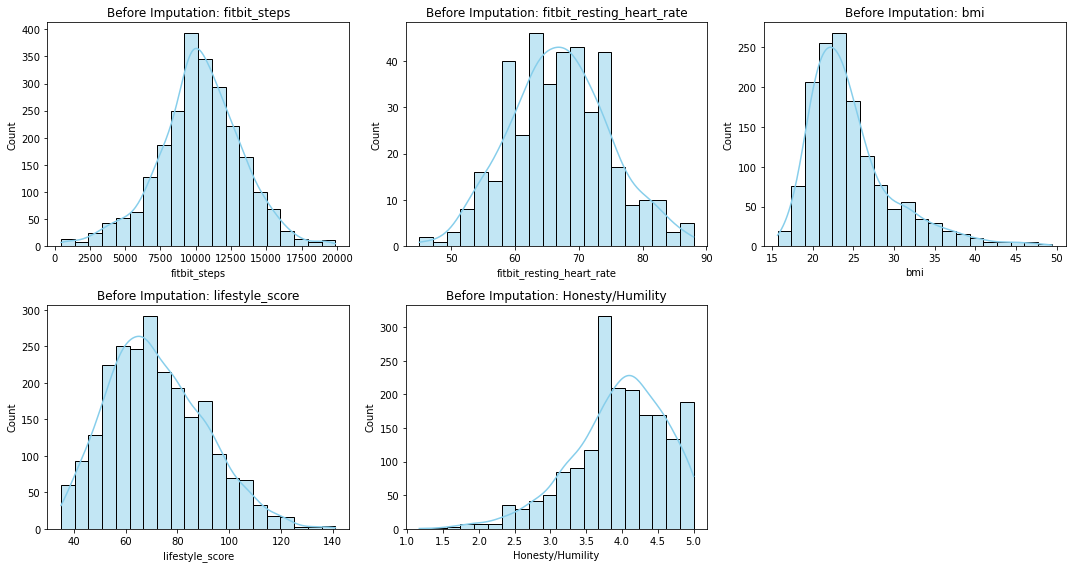

In [15]:
# 1. Visualizing the data before imputation
plt.figure(figsize=(15, 8))
for i, column in enumerate(columns_with_missing, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=20, kde=True, color='skyblue')
    plt.title(f'Before Imputation: {column}')
plt.tight_layout()
plt.show()

### 3.1.2 Iterative Imputer

In [16]:
# 2. Impute missing values using Iterative Imputer (MICE)
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = df.copy()
df_imputed[columns_with_missing] = iterative_imputer.fit_transform(df[columns_with_missing])

### 3.1.3 Distribution after Handeling Missing Values

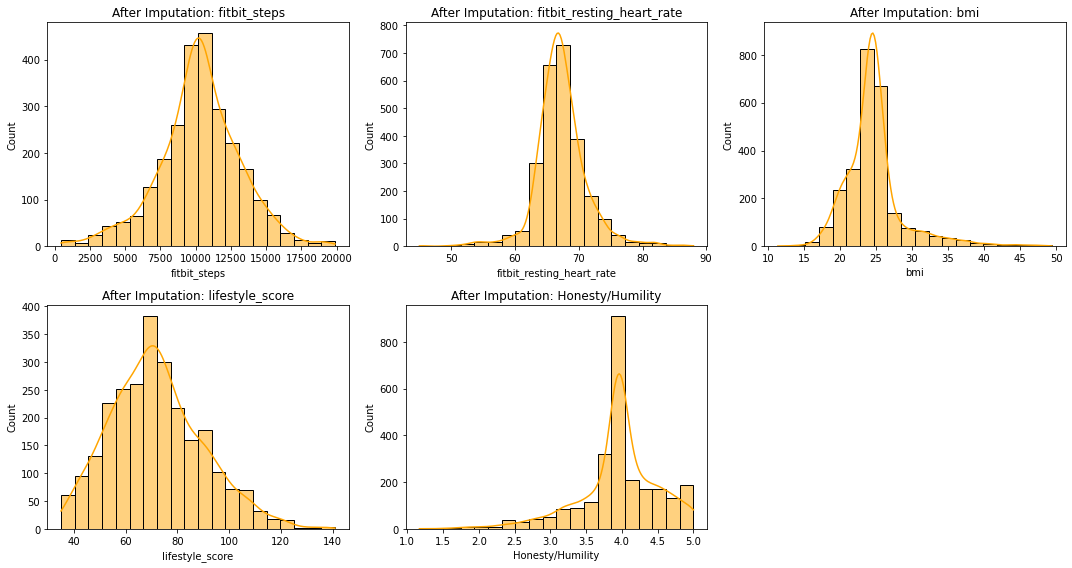

In [17]:
# 3. Visualizing the data after iterative imputation
plt.figure(figsize=(15, 8))
for i, column in enumerate(columns_with_missing, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_imputed[column], bins=20, kde=True, color='orange')
    plt.title(f'After Imputation: {column}')
plt.tight_layout()
plt.show()

- The iterative imputation method has effectively filled in the missing values while maintaining the original distributions.
- The imputed data looks consistent with the patterns seen before imputation, indicating that the approach did not distort the underlying distributions.

In [18]:
missing_values_after = df_imputed.isna().sum()
print("Missing values after handling:")
print(missing_values_after)

Missing values after handling:
stu                          0
sex                          0
fitbit_steps                 0
fitbit_resting_heart_rate    0
bmi                          0
lifestyle_score              0
Honesty/Humility             0
Negative Emotionality        0
Extraversion                 0
Agreeableness                0
Conscientiousness            0
Openness to Experiences      0
dtype: int64


In [19]:
new_data = df_imputed.copy()

### 3.1.4 Correlation Matrix after Handing Missing Values

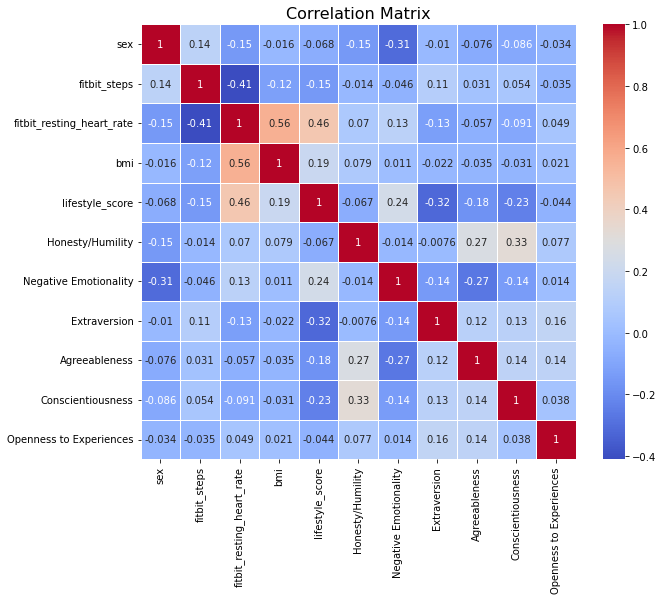

In [20]:
# Generate a correlation matrix
corr_matrix = new_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=.5)

# Add title to the heatmap
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()


## 3.2 Feature Engineering 

In [21]:
# Step 1: Recreate 'activity_level' based on fitbit_steps
new_data['activity_level'] = pd.cut(new_data['fitbit_steps'], 
                                    bins=[0, 5000, 9999, float('inf')], 
                                    labels=['Sedentary', 'Moderately Active', 'Active'], 
                                    right=False)

In [22]:
# Step 4: Check the distribution of activity levels to ensure the feature was created correctly
activity_level_distribution = new_data['activity_level'].value_counts()
activity_level_distribution_percentage = new_data['activity_level'].value_counts(normalize=True) * 100

# Displaying the distribution counts and percentages
print("Activity Level Distribution (Counts):")
print(activity_level_distribution)
print("\nActivity Level Distribution (Percentage):")
print(activity_level_distribution_percentage)

Activity Level Distribution (Counts):
Active               1444
Moderately Active    1015
Sedentary             121
Name: activity_level, dtype: int64

Activity Level Distribution (Percentage):
Active               55.968992
Moderately Active    39.341085
Sedentary             4.689922
Name: activity_level, dtype: float64


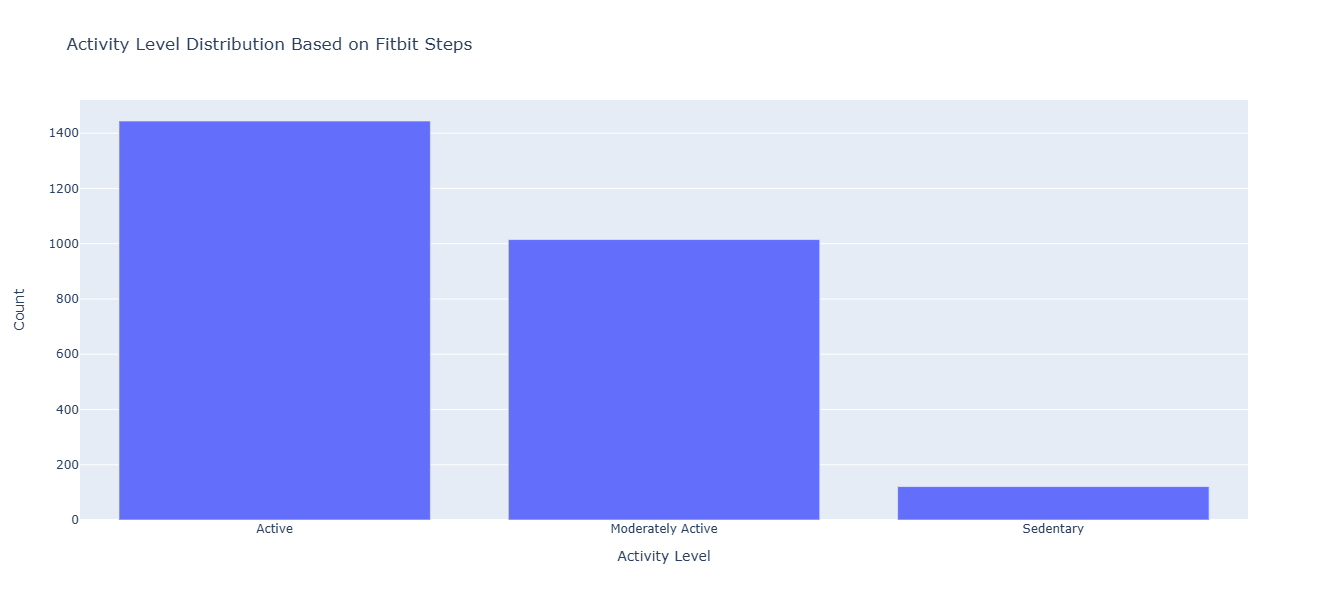

In [23]:
# Calculate the distribution of activity levels
activity_level_distribution = new_data['activity_level'].value_counts().reset_index()
activity_level_distribution.columns = ['Activity Level', 'Count']

# Plot the distribution using Plotly
fig = px.bar(activity_level_distribution, x="Activity Level", y="Count", title="Activity Level Distribution Based on Fitbit Steps")
# Set the figure size to be square
fig.update_layout(width=600, height=600)
fig.show()

The graph shows an imbalance in activity levels, with most data in "Active" and "Moderately Active" categories, suggesting a need for balancing techniques to improve model performance across all classes.

In [24]:
new_data.drop(columns=['stu'], inplace=True)

In [101]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   sex                        2580 non-null   int64   
 1   fitbit_steps               2580 non-null   float64 
 2   fitbit_resting_heart_rate  2580 non-null   float64 
 3   bmi                        2580 non-null   float64 
 4   lifestyle_score            2580 non-null   float64 
 5   Honesty/Humility           2580 non-null   float64 
 6   Negative Emotionality      2580 non-null   float64 
 7   Extraversion               2580 non-null   float64 
 8   Agreeableness              2580 non-null   float64 
 9   Conscientiousness          2580 non-null   float64 
 10  Openness to Experiences    2580 non-null   float64 
 11  activity_level             2580 non-null   category
dtypes: category(1), float64(10), int64(1)
memory usage: 224.5 KB


In [106]:
new_data.to_csv('new_data_train&test.csv', index=False)

## 3.3 Features and Target Variable

In [25]:
# Prepare features (X) and target (y)
X = new_data.drop(columns=['sex', 'activity_level', 'fitbit_steps','lifestyle_score'])
y = new_data['activity_level'].astype(str)

## 3.4 Train Test Split

In [26]:
# Calculate 10% of each class
test_size_per_class = 0.1

# Create an empty test set
X_test_list = []
y_test_list = []

# Stratify sampling for each class
for class_label in y.unique():
    # Filter data for the specific class
    X_class = X[y == class_label]
    y_class = y[y == class_label]
    
    # Split the class data into train and test sets
    X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
        X_class, y_class, test_size=test_size_per_class, random_state=42
    )
    
    # Append the test data for this class to the test set
    X_test_list.append(X_class_test)
    y_test_list.append(y_class_test)

# Combine the test sets for all classes
X_test = pd.concat(X_test_list, axis=0)
y_test = pd.concat(y_test_list, axis=0)

# Remove the test samples from the original dataset to create the train set
X_train = X.drop(X_test.index)
y_train = y.drop(y_test.index)

# Check the distribution in the train and test sets
print("Train set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())

Train set class distribution:
Active               1299
Moderately Active     913
Sedentary             108
Name: activity_level, dtype: int64

Test set class distribution:
Active               145
Moderately Active    102
Sedentary             13
Name: activity_level, dtype: int64


## 3.5 Handling Class Imbalance

In [27]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [28]:
# Check the distribution of activity levels after SMOTE
activity_level_distribution_smote = pd.Series(y_train_resampled).value_counts()
activity_level_distribution_smote_percentage = pd.Series(y_train_resampled).value_counts(normalize=True) * 100

In [29]:
# Displaying the distribution counts and percentages after SMOTE
print("Activity Level Distribution after SMOTE (Counts):")
print(activity_level_distribution_smote)
print("\nActivity Level Distribution after SMOTE (Percentage):")
print(activity_level_distribution_smote_percentage)

Activity Level Distribution after SMOTE (Counts):
Active               1299
Moderately Active    1299
Sedentary            1299
Name: activity_level, dtype: int64

Activity Level Distribution after SMOTE (Percentage):
Active               33.333333
Moderately Active    33.333333
Sedentary            33.333333
Name: activity_level, dtype: float64


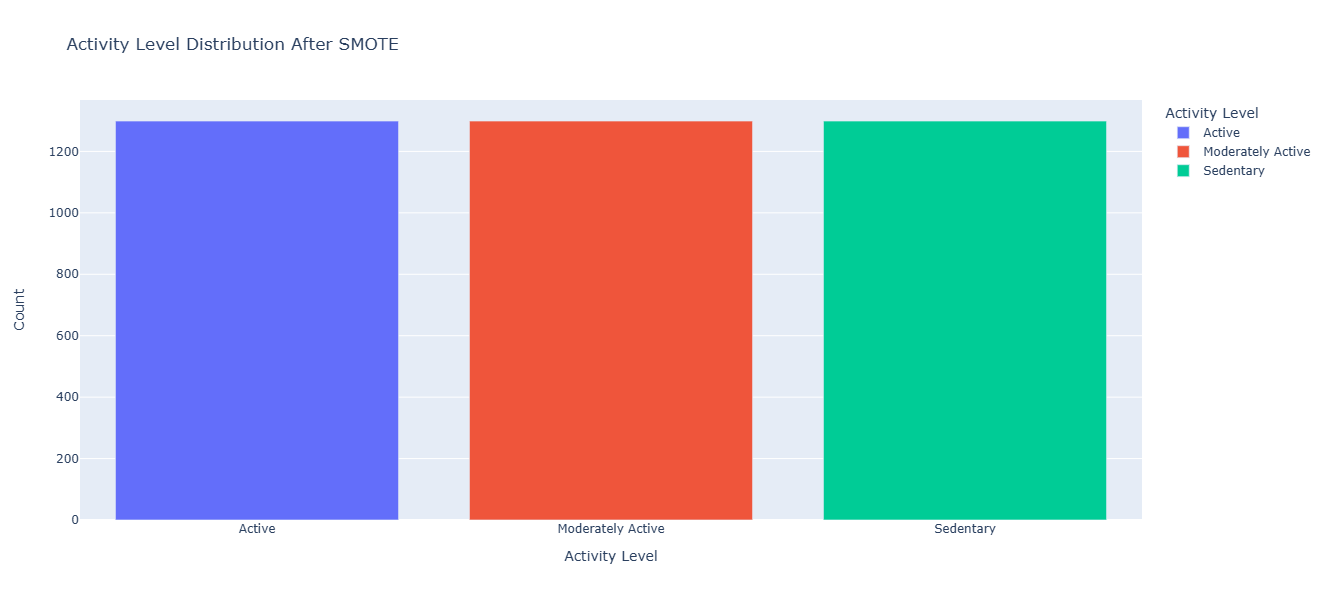

In [116]:
# Create a DataFrame for Plotly
df_distribution = activity_level_distribution_smote.reset_index()
df_distribution.columns = ['Activity Level', 'Count']

# Create the bar chart
fig = px.bar(df_distribution, 
             x='Activity Level', 
             y='Count', 
             title='Activity Level Distribution After SMOTE',
             labels={'Activity Level': 'Activity Level', 'Count': 'Count'},
             color='Activity Level')
fig.update_layout(width=600, height=600)
# Show the figure
fig.show()

In [113]:
# Get the shapes of the training and testing sets
train_shape = X_train_resampled.shape, y_train_resampled.shape
test_shape = X_test.shape, y_test.shape

train_shape, test_shape


(((3897, 8), (3897,)), ((260, 8), (260,)))

# 4. Modelling and Evaluation 

## 4.1 Baseline Models Training and Testing (Without HyperParameter Tuning)

### 4.1.1 Basic Classifiers

In [31]:
# Logistic Regression Classifier
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_resampled, y_train_resampled)

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=42)

In [32]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [33]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

### 4.1.2 Intermediate Classifiers

In [34]:
# Support Vector Machine Classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

In [35]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

### 4.1.3 Advanced Classifiers

In [36]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [37]:
# AdaBoost Classifier
ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier(random_state=42)

In [38]:
# Bagging Classifier
bagging_classifier = BaggingClassifier(random_state=42)
bagging_classifier.fit(X_train_resampled, y_train_resampled)

BaggingClassifier(random_state=42)

### 4.1.4 Evaluation

In [39]:
# You can evaluate each classifier on the test data and compare their performance
logreg_predictions = logreg_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
gb_predictions = gb_classifier.predict(X_test)
ada_predictions = ada_classifier.predict(X_test)
bagging_predictions = bagging_classifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

# Example: Print accuracy scores for each model
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, logreg_predictions),
    "K-Nearest Neighbors": accuracy_score(y_test, knn_predictions),
    "Decision Tree": accuracy_score(y_test, dt_predictions),
    "Random Forest": accuracy_score(y_test, rf_predictions),
    "SVM": accuracy_score(y_test, svm_predictions),
    "Gradient Boosting": accuracy_score(y_test, gb_predictions),
    "AdaBoost": accuracy_score(y_test, ada_predictions),
    "Bagging": accuracy_score(y_test, bagging_predictions)
}

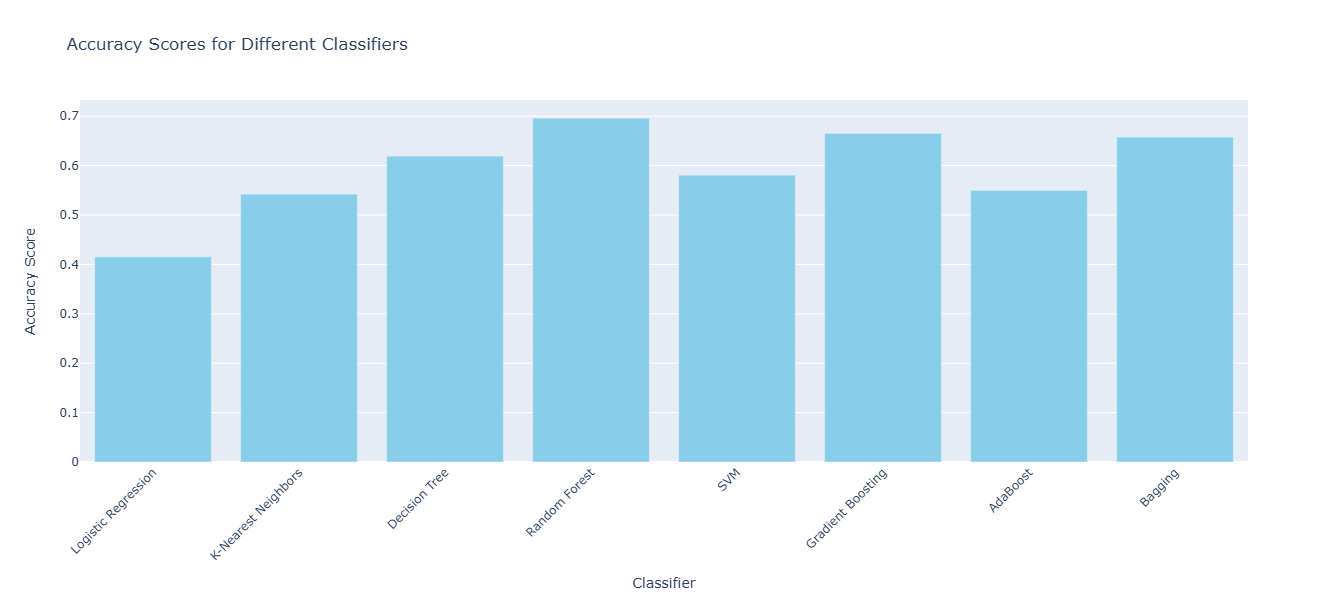

In [41]:
# Plotting accuracy scores
fig = go.Figure(data=[
    go.Bar(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), marker_color='skyblue')
])

fig.update_layout(
    title='Accuracy Scores for Different Classifiers',
    xaxis_title='Classifier',
    yaxis_title='Accuracy Score',
    xaxis_tickangle=-45
)
fig.update_layout(width=600, height=600)
fig.show()

In [42]:
# Display separate classification reports for each classifier
classifiers = {
    "Logistic Regression": logreg_predictions,
    "K-Nearest Neighbors": knn_predictions,
    "Decision Tree": dt_predictions,
    "Random Forest": rf_predictions,
    "SVM": svm_predictions,
    "Gradient Boosting": gb_predictions,
    "AdaBoost": ada_predictions,
    "Bagging": bagging_predictions
}

from sklearn.metrics import classification_report, confusion_matrix

# Print classification report and confusion matrix for each classifier
for classifier_name, predictions in classifiers.items():
    print(f"\nClassification Report for {classifier_name}:")
    print(classification_report(y_test, predictions))
    
    # Calculate and print the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"\nConfusion Matrix for {classifier_name}:")
    print(cm)



Classification Report for Logistic Regression:
                   precision    recall  f1-score   support

           Active       0.67      0.51      0.58       145
Moderately Active       0.42      0.26      0.32       102
        Sedentary       0.08      0.54      0.14        13

         accuracy                           0.42       260
        macro avg       0.39      0.44      0.35       260
     weighted avg       0.54      0.42      0.46       260


Confusion Matrix for Logistic Regression:
[[74 35 36]
 [33 27 42]
 [ 3  3  7]]

Classification Report for K-Nearest Neighbors:
                   precision    recall  f1-score   support

           Active       0.70      0.55      0.62       145
Moderately Active       0.47      0.52      0.50       102
        Sedentary       0.24      0.62      0.34        13

         accuracy                           0.54       260
        macro avg       0.47      0.56      0.48       260
     weighted avg       0.59      0.54      0.56    

In [43]:
print("\nAccuracy Scores:")
for model, score in accuracy_scores.items():
    print(f"{model} Accuracy: {score}")


Accuracy Scores:
Logistic Regression Accuracy: 0.4153846153846154
K-Nearest Neighbors Accuracy: 0.5423076923076923
Decision Tree Accuracy: 0.6192307692307693
Random Forest Accuracy: 0.6961538461538461
SVM Accuracy: 0.5807692307692308
Gradient Boosting Accuracy: 0.6653846153846154
AdaBoost Accuracy: 0.55
Bagging Accuracy: 0.6576923076923077


### 4.1.5 Feature Importance

In [44]:
# Step 5: Feature importance for Random Forest
feature_names = X.columns
feature_importances_rf = rf_classifier.feature_importances_


# feature_names = X.columns or feature_names = [list_of_feature_names]
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_rf
})

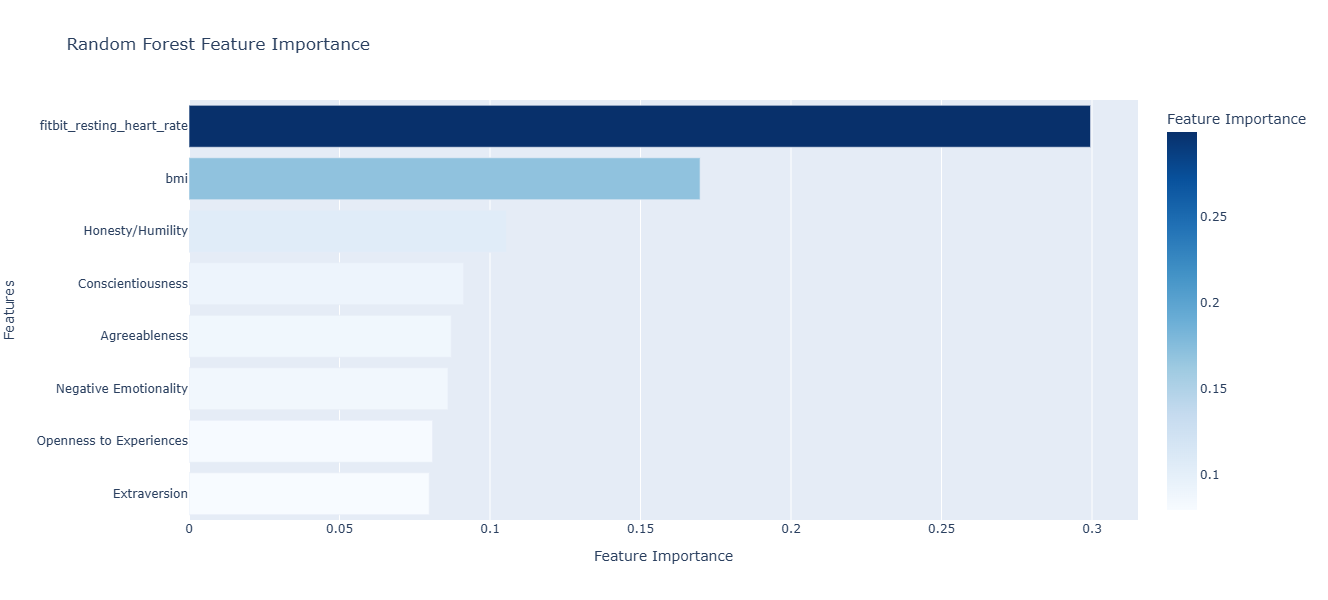

In [45]:
# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance using Plotly
fig = px.bar(feature_importance_df, x='Importance', y='Feature', orientation='h', title='Random Forest Feature Importance',
             labels={'Importance': 'Feature Importance', 'Feature': 'Features'}, color='Importance',
             color_continuous_scale='blues')

fig.update_layout(yaxis=dict(autorange="reversed"))  # To display the most important feature at the top
fig.update_layout(width=600, height=600)
fig.show()

## 4.2 Model Training and Testing with Hyperparameter Tuning and Cross-Validation

### 4.2.1 Parameters Grids

In [48]:
# Define hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            "solver": ["lbfgs", "liblinear", "saga"],
            "C": [0.1, 1, 10],
            "max_iter": [100, 500, 1000]
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan"]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            "learning_rate": [0.01, 0.1, 0.2],
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 5, 10]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1]
        }
    },
    "Support Vector Classifier": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    }
}

### 4.2.2 Finding Best Estimator using HalvingGridSearchCV

In [50]:
# Perform HalvingGridSearchCV for each model
best_estimators = {}
for name, grid in param_grids.items():
    print(f"Hyperparameter tuning for {name}...")
    
    # Initialize HalvingGridSearchCV
    halving_cv = HalvingGridSearchCV(
        estimator=grid["model"],
        param_grid=grid["params"],
        cv=5,
        factor=3,  # Factor for halving
        scoring="accuracy",
        n_jobs=-1,
        verbose=1
    )
    
    # Fit HalvingGridSearchCV
    halving_cv.fit(X_train_resampled, y_train_resampled)
    
    # Store best estimator and parameters
    best_estimators[name] = {
        "best_model": halving_cv.best_estimator_,
        "best_params": halving_cv.best_params_,
        "best_score": halving_cv.best_score_
    }
    
    print(f"Best Parameters for {name}:\n{halving_cv.best_params_}\n")
    print(f"Best CV Score for {name}: {halving_cv.best_score_:.4f}\n")
    print("-" * 80)

Hyperparameter tuning for Logistic Regression...
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 144
max_resources_: 3897
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 27
n_resources: 144
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 9
n_resources: 432
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 3
n_resources: 1296
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 3
n_candidates: 1
n_resources: 3888
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for Logistic Regression:
{'C': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}

Best CV Score for Logistic Regression: 0.6041

--------------------------------------------------------------------------------
Hyperparameter tuning for K-Nearest Neighbors...
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 433


In [51]:
# Define models with their best parameters manually
tuned_models = {
    "Logistic Regression": LogisticRegression(C=0.1, max_iter=500, solver='lbfgs', class_weight="balanced"),
    "K-Nearest Neighbors": KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=2),
    "Random Forest": RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=50, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=100),
    "AdaBoost": AdaBoostClassifier(learning_rate=0.1, n_estimators=200),
    "Support Vector Classifier": SVC(C=10, gamma='auto', kernel='rbf', probability=True, class_weight="balanced")
}

### 4.2.3 Evaluation using best parameters

In [52]:
# Initialize a dictionary to store results
final_results = {}

In [53]:
# Evaluate each model
for name, model in tuned_models.items():
    print(f"Evaluating {name} on the test set...\n")
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Get predicted probabilities for ROC curve (if applicable)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Classification report
    cr = classification_report(y_test, y_pred, output_dict=True)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print("-" * 80)
    
    # Save results for analysis
    final_results[name] = {
        "model": model,
        "classification_report": cr,
        "confusion_matrix": cm
    }


Evaluating Logistic Regression on the test set...

Classification Report:
                   precision    recall  f1-score   support

           Active       0.78      0.75      0.76       145
Moderately Active       0.60      0.38      0.47       102
        Sedentary       0.16      0.69      0.26        13

         accuracy                           0.60       260
        macro avg       0.51      0.61      0.50       260
     weighted avg       0.68      0.60      0.62       260

Confusion Matrix:
[[109  22  14]
 [ 31  39  32]
 [  0   4   9]]
--------------------------------------------------------------------------------
Evaluating K-Nearest Neighbors on the test set...

Classification Report:
                   precision    recall  f1-score   support

           Active       0.73      0.65      0.69       145
Moderately Active       0.54      0.54      0.54       102
        Sedentary       0.20      0.46      0.28        13

         accuracy                           0.60     

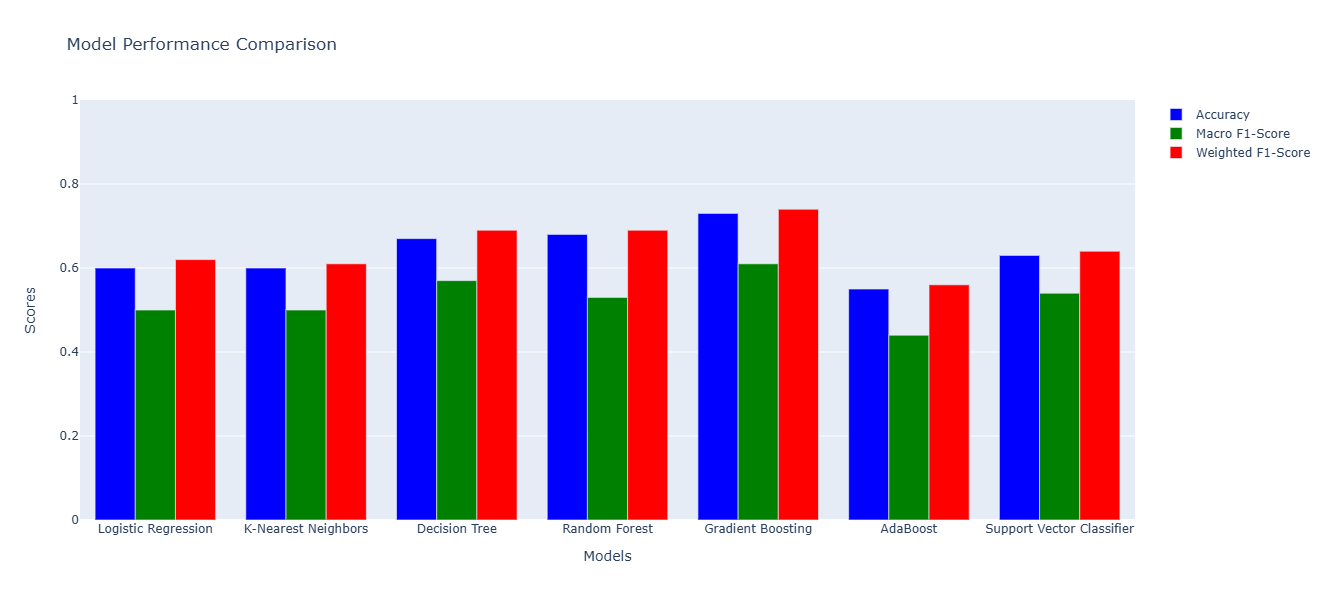

In [120]:
# Results Data
models = [
    "Logistic Regression", "K-Nearest Neighbors", "Decision Tree",
    "Random Forest", "Gradient Boosting", "AdaBoost", "Support Vector Classifier"
]
accuracy = [0.60, 0.60, 0.67, 0.68, 0.73, 0.55, 0.63]
macro_f1 = [0.50, 0.50, 0.57, 0.53, 0.61, 0.44, 0.54]
weighted_f1 = [0.62, 0.61, 0.69, 0.69, 0.74, 0.56, 0.64]

# Create bar charts
fig = go.Figure()

# Add accuracy bar
fig.add_trace(go.Bar(
    x=models,
    y=accuracy,
    name='Accuracy',
    marker_color='blue'
))

# Add Macro F1-Score bar
fig.add_trace(go.Bar(
    x=models,
    y=macro_f1,
    name='Macro F1-Score',
    marker_color='green'
))

# Add Weighted F1-Score bar
fig.add_trace(go.Bar(
    x=models,
    y=weighted_f1,
    name='Weighted F1-Score',
    marker_color='red'
))

# Update layout
fig.update_layout(
    title='Model Performance Comparison',
    xaxis_title='Models',
    yaxis_title='Scores',
    barmode='group',
    yaxis=dict(range=[0, 1]),
)
fig.update_layout(width=600, height=600)
# Show plot
fig.show()

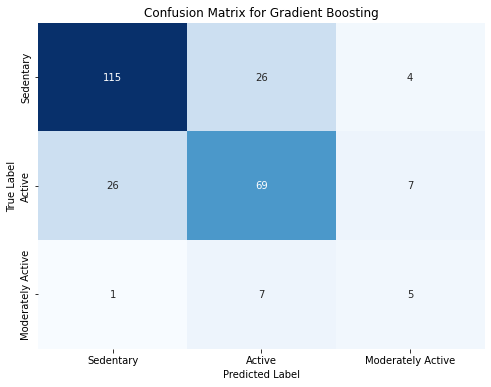

In [133]:
# `final_results` contains the results
model_name = "Gradient Boosting"
model = final_results[model_name]["model"]

# Predict on the test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get original class names
class_names = list(set(y_test))  # Replace with your actual class names if needed

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.title(f'Confusion Matrix for {model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 4.3 Ensemble Technique: Stacking Classifiers

### 4.3.1 Stacking Classifier (RF+GB+SVC, Meta Model: LR)

In [67]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define the base models with their best parameters
base_models = [
    ('Random Forest', RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=50, class_weight="balanced", random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=100, random_state=42)),
    ('SVC', SVC(C=10, gamma='auto', kernel='rbf', probability=True, class_weight="balanced", random_state=42))
]

# Define the meta-model (Logistic Regression)
meta_model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight="balanced")

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,  # Cross-validation for meta-model training
    n_jobs=-1  # Use all processors
)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
print("Classification Report for Stacking Classifier:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for Stacking Classifier:")
print(confusion_matrix(y_test, y_pred))


Classification Report for Stacking Classifier:
                   precision    recall  f1-score   support

           Active       0.80      0.77      0.78       145
Moderately Active       0.63      0.45      0.53       102
        Sedentary       0.19      0.69      0.30        13

         accuracy                           0.64       260
        macro avg       0.54      0.64      0.53       260
     weighted avg       0.70      0.64      0.66       260

Confusion Matrix for Stacking Classifier:
[[111  23  11]
 [ 28  46  28]
 [  0   4   9]]


### 4.3.2 Finding best Combination for Stacking Classifier using best Parameters from HalvingGridSearchCV

In [71]:
from itertools import combinations
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Define all the tuned models
tuned_models = {
    "Logistic Regression": LogisticRegression(C=0.1, max_iter=500, solver='lbfgs', class_weight="balanced"),
    "K-Nearest Neighbors": KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=2),
    "Random Forest": RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=50, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=100),
    "AdaBoost": AdaBoostClassifier(learning_rate=0.1, n_estimators=200),
    "Support Vector Classifier": SVC(C=10, gamma='auto', kernel='rbf', probability=True, class_weight="balanced")
}

# Define meta-models to test
meta_models = [
    LogisticRegression(max_iter=500, solver='lbfgs', class_weight="balanced"),
    DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=2),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50),
]

# DataFrame to store results
results = []

# Iterate over all combinations of base models (up to 4 models at a time)
for r in range(2, 7):  # Use combinations of 2 to 4 models
    for base_combo in combinations(tuned_models.items(), r):
        base_model_names = [name for name, _ in base_combo]
        base_model_estimators = [(name, model) for name, model in base_combo]
        
        for meta_model in meta_models:
            # Create the stacking classifier
            stacking_clf = StackingClassifier(
                estimators=base_model_estimators,
                final_estimator=meta_model,
                cv=5,
                n_jobs=-1
            )
            
            try:
                # Train the stacking classifier
                stacking_clf.fit(X_train, y_train)
                y_pred = stacking_clf.predict(X_test)

                # Evaluate performance
                report = classification_report(y_test, y_pred, output_dict=True)
                accuracy = report['accuracy']
                weighted_f1 = report['weighted avg']['f1-score']
                macro_f1 = report['macro avg']['f1-score']
                confusion = confusion_matrix(y_test, y_pred)

                # Append results to the DataFrame
                results.append({
                    "Base Models": base_model_names,
                    "Meta Model": meta_model.__class__.__name__,
                    "Accuracy": accuracy,
                    "Weighted F1": weighted_f1,
                    "Macro F1": macro_f1,
                    "Confusion Matrix": confusion
                })

            except Exception as e:
                print(f"An error occurred for combination {base_model_names} with meta model {meta_model.__class__.__name__}: {e}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display sorted results
sorted_results = results_df.sort_values(by="Accuracy", ascending=False)
print("Top Stacking Classifier Combinations:")
print(sorted_results[["Base Models", "Meta Model", "Accuracy", "Weighted F1", "Macro F1"]].head(10))


C:\Users\ajink\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ajink\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Top Stacking Classifier Combinations:
                                           Base Models  \
158       [Random Forest, Gradient Boosting, AdaBoost]   
149       [Decision Tree, Gradient Boosting, AdaBoost]   
59      [Gradient Boosting, Support Vector Classifier]   
38                  [Decision Tree, Gradient Boosting]   
140  [Decision Tree, Random Forest, Gradient Boosting]   
26            [K-Nearest Neighbors, Gradient Boosting]   
227  [Logistic Regression, Gradient Boosting, AdaBo...   
248  [K-Nearest Neighbors, Random Forest, Gradient ...   
191  [Logistic Regression, K-Nearest Neighbors, Gra...   
320  [K-Nearest Neighbors, Decision Tree, Random Fo...   

                     Meta Model  Accuracy  Weighted F1  Macro F1  
158  GradientBoostingClassifier  0.776923     0.772967  0.656814  
149  GradientBoostingClassifier  0.761538     0.755968  0.630006  
59   GradientBoostingClassifier  0.761538     0.752310  0.601053  
38   GradientBoostingClassifier  0.750000     0.738830 

In [73]:
sorted_results.head(10)

,Base Models,Meta Model,Accuracy,Weighted F1,Macro F1,Confusion Matrix
158,"[Random Forest, Gradient Boosting, AdaBoost]",GradientBoostingClassifier,0.776923,0.772967,0.656814,"[[120, 23, 2], [23, 78, 1], [2, 7, 4]]"
149,"[Decision Tree, Gradient Boosting, AdaBoost]",GradientBoostingClassifier,0.761538,0.755968,0.630006,"[[117, 28, 0], [23, 78, 1], [1, 9, 3]]"
59,"[Gradient Boosting, Support Vector Classifier]",GradientBoostingClassifier,0.761538,0.752310,0.601053,"[[119, 26, 0], [25, 77, 0], [0, 11, 2]]"
38,"[Decision Tree, Gradient Boosting]",GradientBoostingClassifier,0.750000,0.738830,0.551570,"[[117, 28, 0], [24, 77, 1], [0, 12, 1]]"
140,"[Decision Tree, Random Forest, Gradient Boosting]",GradientBoostingClassifier,0.750000,0.740480,0.592190,"[[119, 26, 0], [28, 74, 0], [0, 11, 2]]"
26,"[K-Nearest Neighbors, Gradient Boosting]",GradientBoostingClassifier,0.750000,0.741596,0.593684,"[[116, 29, 0], [25, 77, 0], [0, 11, 2]]"
227,"[Logistic Regression, Gradient Boosting, AdaBo...",GradientBoostingClassifier,0.750000,0.741550,0.547419,"[[117, 25, 3], [24, 77, 1], [0, 12, 1]]"
248,"[K-Nearest Neighbors, Random Forest, Gradient ...",GradientBoostingClassifier,0.750000,0.746515,0.630558,"[[119, 25, 1], [27, 72, 3], [1, 8, 4]]"
191,"[Logistic Regression, K-Nearest Neighbors, Gra...",GradientBoostingClassifier,0.746154,0.739286,0.582783,"[[115, 29, 1], [24, 77, 1], [0, 11, 2]]"
320,"[K-Nearest Neighbors, Decision Tree, Random Fo...",GradientBoostingClassifier,0.746154,0.739573,0.579038,"[[116, 29, 0], [23, 76, 3], [2, 9, 2]]"


### 4.3.3 HyperParameter Tuning and Cross Validation for Meta Model (Best Stacking Combination)

In [94]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the best combination of base models
base_models = [
    ('Random Forest', RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=50, class_weight="balanced", random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=100, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42))
]

# Define the meta-model and its parameter grid for tuning
meta_model = GradientBoostingClassifier(random_state=42)
meta_param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150]
}

# Create the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# Setup HalvingGridSearchCV
halving_search = HalvingGridSearchCV(
    estimator=stacking_clf,
    param_grid={'final_estimator__' + key: value for key, value in meta_param_grid.items()},
    factor=3,  # Reduces resources by a factor of 3 in each iteration
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1  # Outputs the progress
)

# Perform hyperparameter search
halving_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = halving_search.best_params_
best_model = halving_search.best_estimator_

print("Best Parameters for the Meta-Model:", best_params)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 85
max_resources_: 2320
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 27
n_resources: 85
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 9
n_resources: 255
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 3
n_resources: 765
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 3
n_candidates: 1
n_resources: 2295
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for the Meta-Model: {'final_estimator__learning_rate': 0.05, 'final_estimator__max_depth': 3, 'final_estimator__n_estimators': 50}


### 4.3.4 Train, Test and Evaluation for Best Stacking Classifier Model

In [81]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the best combination of base models
base_models = [
    ('Random Forest', RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=50, class_weight="balanced", random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=100, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42))
]

# Define the meta-model (Gradient Boosting with best parameters from tuning)
meta_model = GradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=50,
    random_state=42
)

# Create the Stacking Classifier
stacking_clf_final = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# Define class weights
class_weights = {"Active": 1, "Moderately Active": 1, "Sedentary": 5}

# Map weights to training data
sample_weights = y_train.map(class_weights)

# Train the stacking classifier using sample weights
stacking_clf_final.fit(X_train, y_train, sample_weight=sample_weights)

# Predict on the test set
y_pred_final = stacking_clf_final.predict(X_test)

# Evaluate the model
print("\nFinal Classification Report with Class Weighting:")
print(classification_report(y_test, y_pred_final))

print("\nFinal Confusion Matrix with Class Weighting:")
print(confusion_matrix(y_test, y_pred_final))



Final Classification Report with Class Weighting:
                   precision    recall  f1-score   support

           Active       0.83      0.81      0.82       145
Moderately Active       0.73      0.60      0.66       102
        Sedentary       0.23      0.62      0.33        13

         accuracy                           0.72       260
        macro avg       0.59      0.67      0.60       260
     weighted avg       0.76      0.72      0.73       260


Final Confusion Matrix with Class Weighting:
[[117  19   9]
 [ 23  61  18]
 [  1   4   8]]


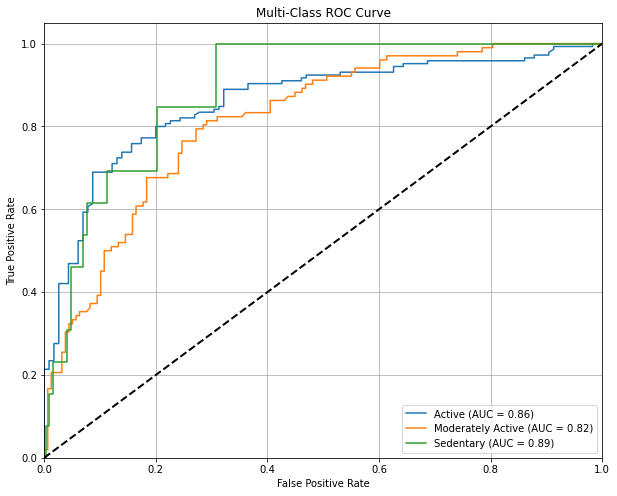

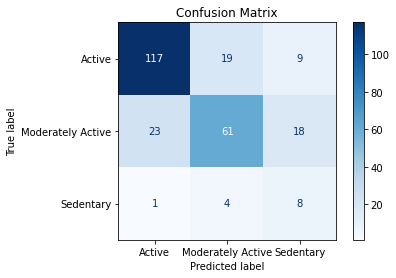

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
import numpy as np

# Classes in the dataset
classes = ["Active", "Moderately Active", "Sedentary"]

# Binarize the labels for multi-class ROC curve
y_test_binarized = label_binarize(y_test, classes=classes)
y_pred_proba = stacking_clf_final.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i, class_name in enumerate(classes):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for class_name in classes:
    plt.plot(fpr[class_name], tpr[class_name], label=f'{class_name} (AUC = {roc_auc[class_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final, display_labels=classes, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


### 4.3.6 Feature Importance using Gradient Boosting (Meta Model)

In [95]:
# Train a standalone Gradient Boosting model for feature importance analysis
gradient_boosting_model = GradientBoostingClassifier(
    learning_rate=0.2, max_depth=5, n_estimators=100, random_state=42
)
gradient_boosting_model.fit(X_train, y_train)

# Extract feature importances
gb_feature_importances = gradient_boosting_model.feature_importances_

# Map feature importances to the original feature names
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": gb_feature_importances
}).sort_values(by="Importance", ascending=False)

# Display the top important features
print("\nTop Important Features from Gradient Boosting:")
print(importance_df)


Top Important Features from Gradient Boosting:
                     Feature  Importance
0  fitbit_resting_heart_rate    0.410627
1                        bmi    0.212198
2           Honesty/Humility    0.137430
4               Extraversion    0.052306
3      Negative Emotionality    0.049044
6          Conscientiousness    0.047735
5              Agreeableness    0.046002
7    Openness to Experiences    0.044658


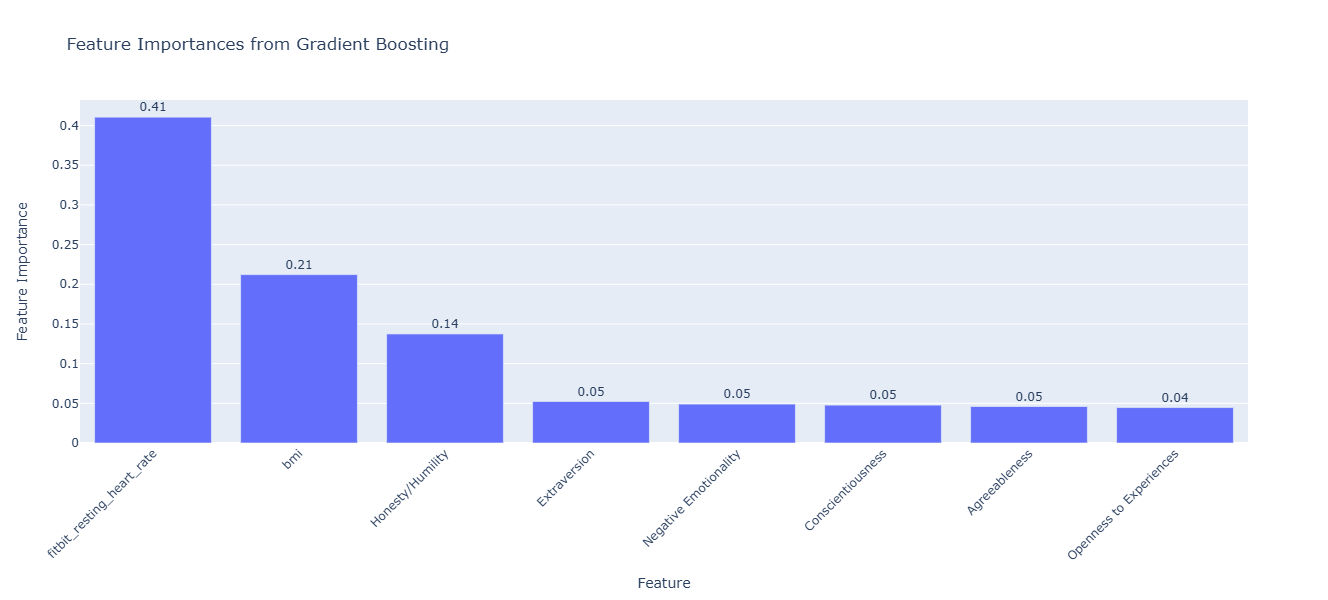

In [123]:
# Create a bar chart
fig = px.bar(
    importance_df,
    x="Feature",
    y="Importance",
    title="Feature Importances from Gradient Boosting",
    labels={"Importance": "Feature Importance"},
    text="Importance"
)

# Add text labels and adjust layout
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, height=600)
fig.update_layout(width=600, height=600)
# Show the plot
fig.show()

# 5 Evaluation of Best Models from all of the Experiments

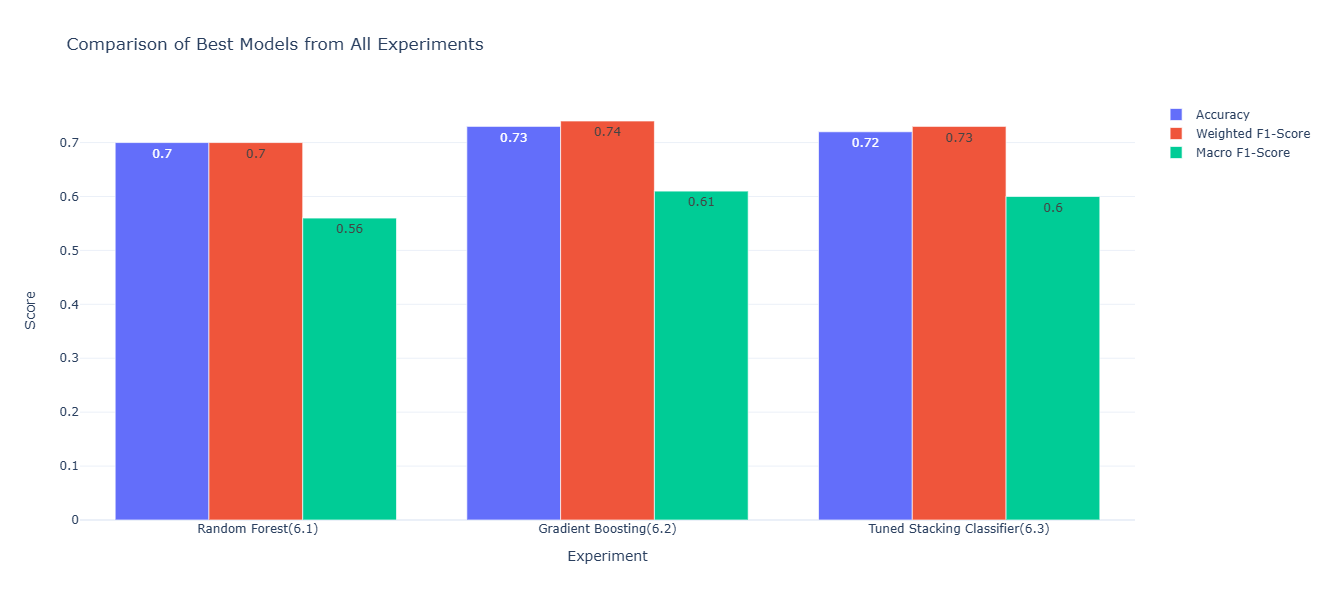

In [128]:
# Data for best models from all experiments
best_models_data = {
    "Experiment": [" Random Forest(6.1)", "Gradient Boosting(6.2)", "Tuned Stacking Classifier(6.3)"],
    "Accuracy": [0.70, 0.73, 0.72],
    "Weighted F1-Score": [0.70, 0.74, 0.73],
    "Macro F1-Score": [0.56, 0.61, 0.60]
}

# Create the bar plot
fig = go.Figure()

# Add bars for each metric
for metric in ["Accuracy", "Weighted F1-Score", "Macro F1-Score"]:
    fig.add_trace(go.Bar(
        x=best_models_data["Experiment"],
        y=best_models_data[metric],
        name=metric,
        text=best_models_data[metric],
        textposition='auto'
    ))

# Update layout
fig.update_layout(
    title='Comparison of Best Models from All Experiments',
    xaxis_title='Experiment',
    yaxis_title='Score',
    barmode='group',
    template='plotly_white'
)
fig.update_layout(width=600, height=600)
# Show the plot
fig.show()

## 5.1 Best Model Dumping for Further Use

In [102]:
import joblib

# Save the trained model to a file
model_file_path = 'stacking_clf_final.pkl'
joblib.dump(stacking_clf_final, model_file_path)

print(f"Model saved to {model_file_path}")

Model saved to stacking_clf_final.pkl
